# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Дедлайн:
16 октября, 23:59

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [4]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

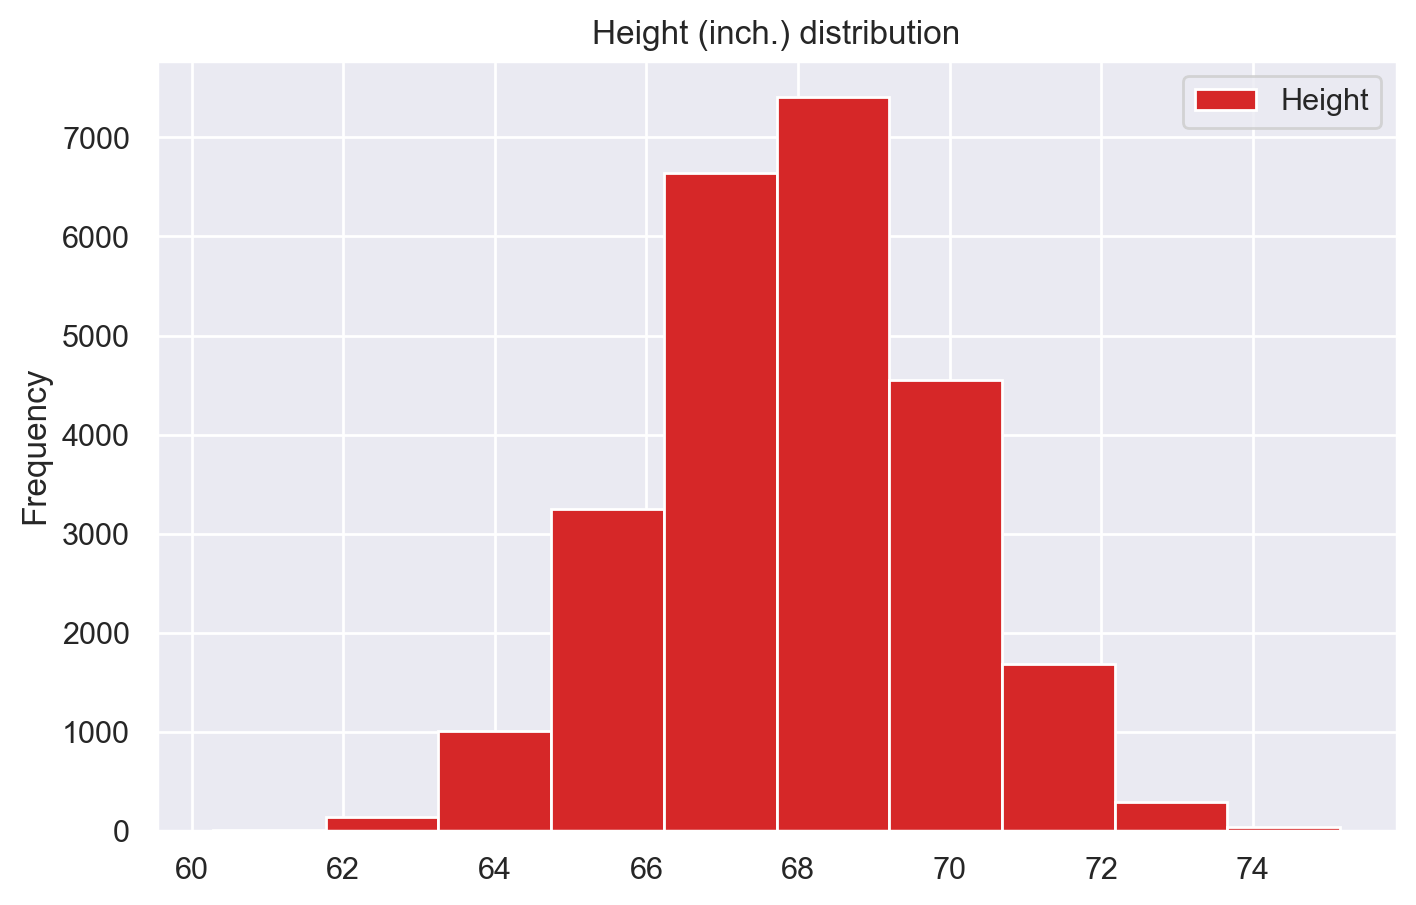

In [5]:
data.plot(y="Height", kind="hist", color="tab:red", title="Height (inch.) distribution")

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

### 1. [0.5 балла] Посмотрите на первые 5 записей таблицы. Нарисуйте гистограмму распределения веса. Сделайте гистограмму зеленой, подпишите картинку.

In [6]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: title={'center': 'Weight (lb.) distribution'}, ylabel='Frequency'>

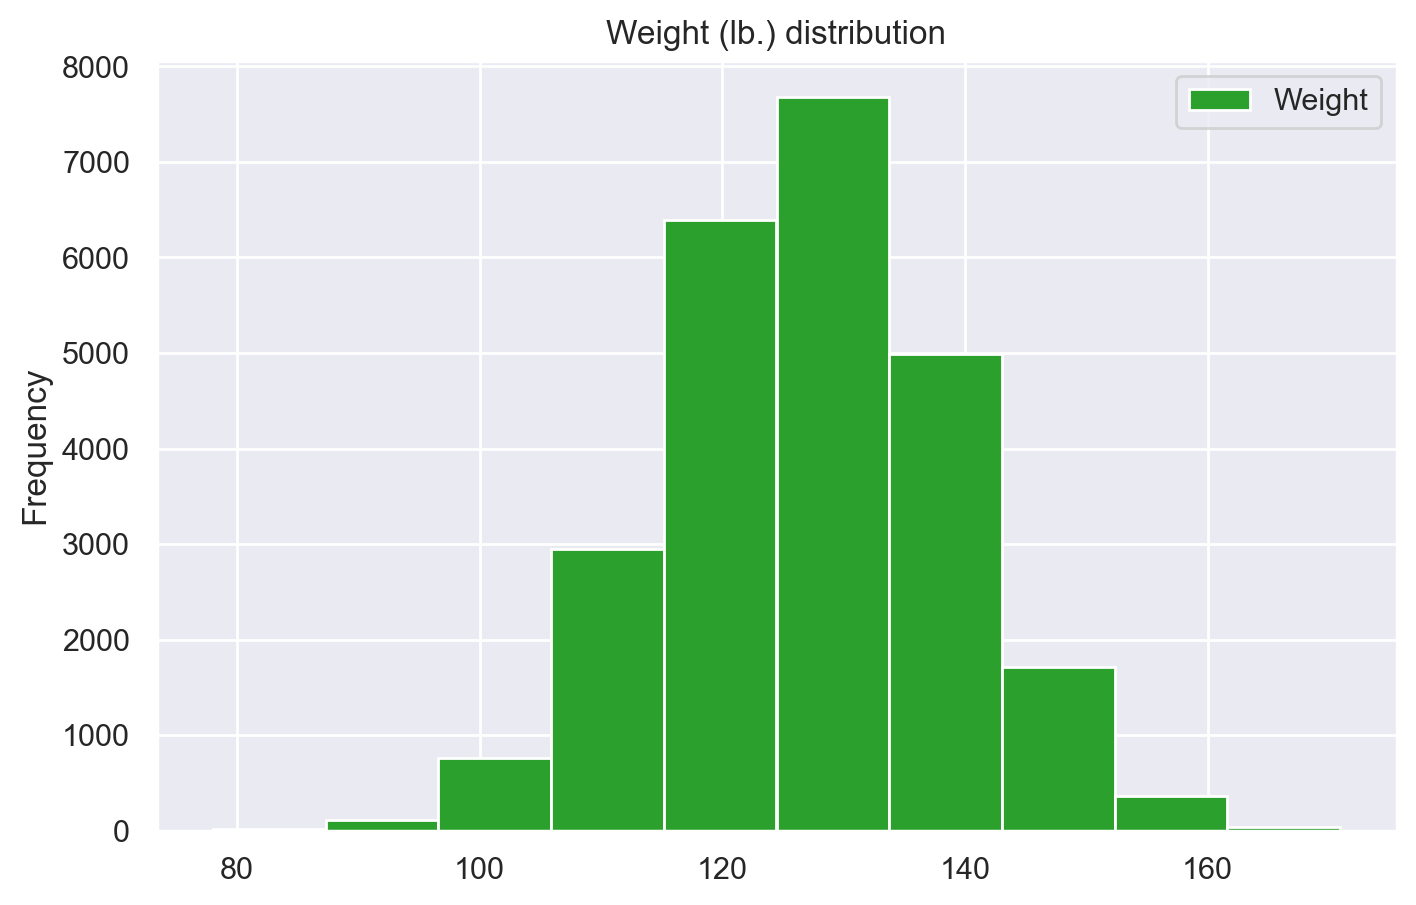

In [7]:
data.plot(y="Weight", kind="hist", color="tab:green", title="Weight (lb.) distribution")

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [8]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

### 2. [0.5 балла] Создайте признак BMI и постройте гистограммы распределения признаков.

In [9]:
data["BMI"] = make_bmi(data["Height"], data["Weight"])

Text(0.5, 0.98, 'Pairwise dependencies of features')

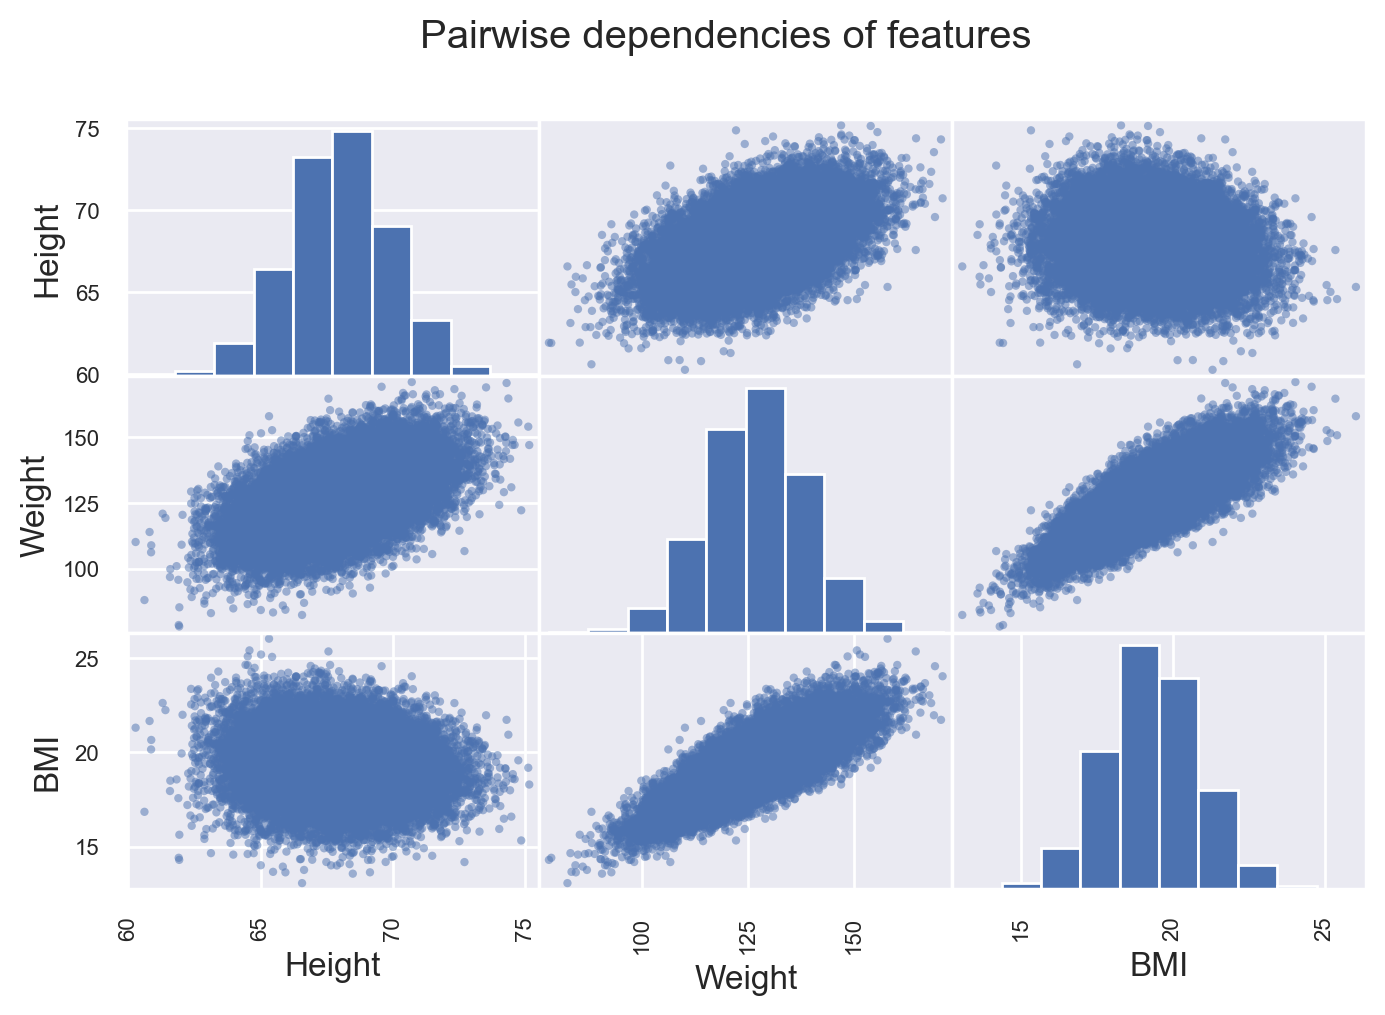

In [10]:
pd.plotting.scatter_matrix(data)
plt.suptitle("Pairwise dependencies of features")

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

### 3. [0.5 балла] Создайте признак весовой категории и постройте boxplot-гистограмму зависимости роста от весовой категории.
Новый признак *weight_category*, должен иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях.

In [11]:
data["Weight_category"] = data.apply(
lambda row: 1 
    if row["Weight"] < 120
    else 2 if row["Weight"] < 150
    else 3,
    axis = 1
)

Text(0.5, 0.98, 'Dependence of height on weight category')

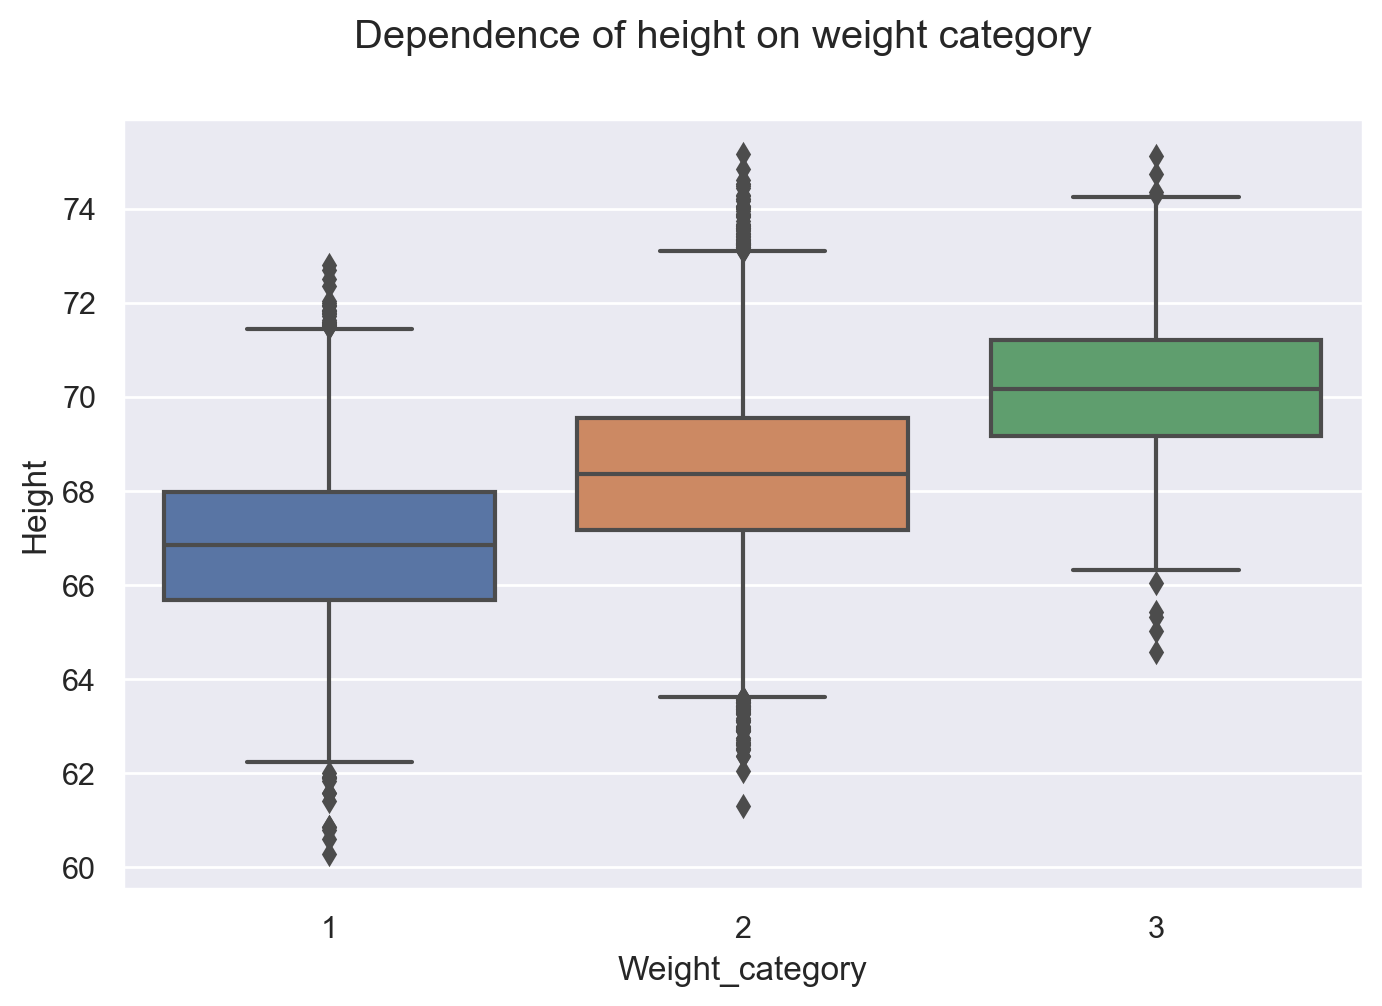

In [12]:
sns.boxplot(y = data["Height"], x = data["Weight_category"])
plt.suptitle("Dependence of height on weight category")

### 4. [0.5 балла]  Постройте scatter plot зависимости роста от веса. Подпишите картинку.

<Axes: title={'center': 'Dependence of height on weight'}, xlabel='Weight', ylabel='Height'>

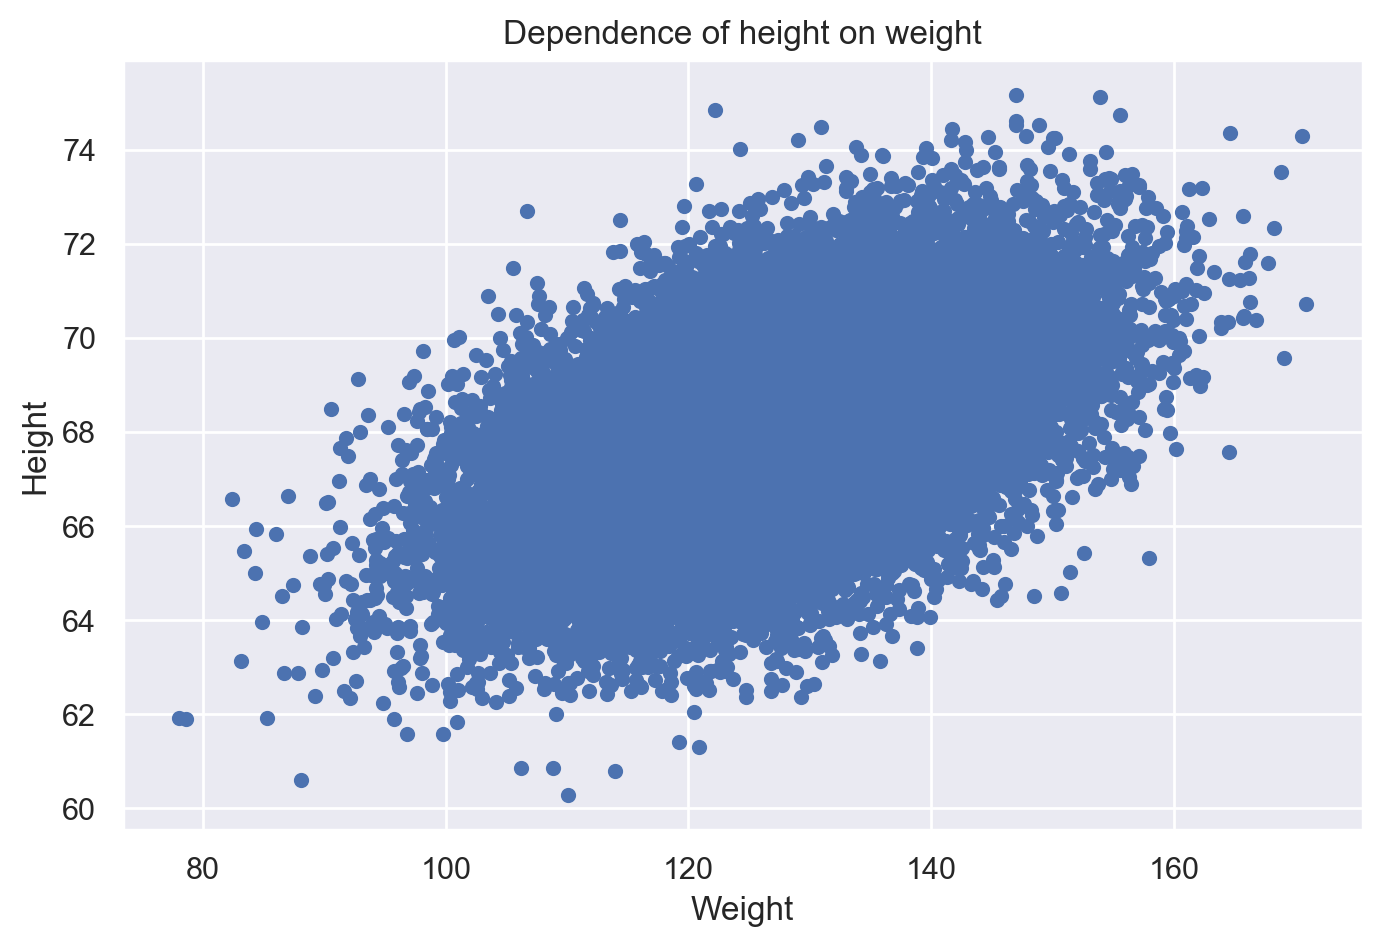

In [13]:
data.plot.scatter(x = "Weight", y = "Height", title ="Dependence of height on weight")

## Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

### 5. [1 балл] Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [14]:
def error(w0, w1):
    res = 0
    for i in range(1, data.shape[0]+1):
        res += (data["Height"][i]-(w0+w1*data["Weight"][i]))**2
    return res

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

### 6. [1 балл] Проведите на графике из п. 4 (scatter plot) две прямые: ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Подпишите оси и график.

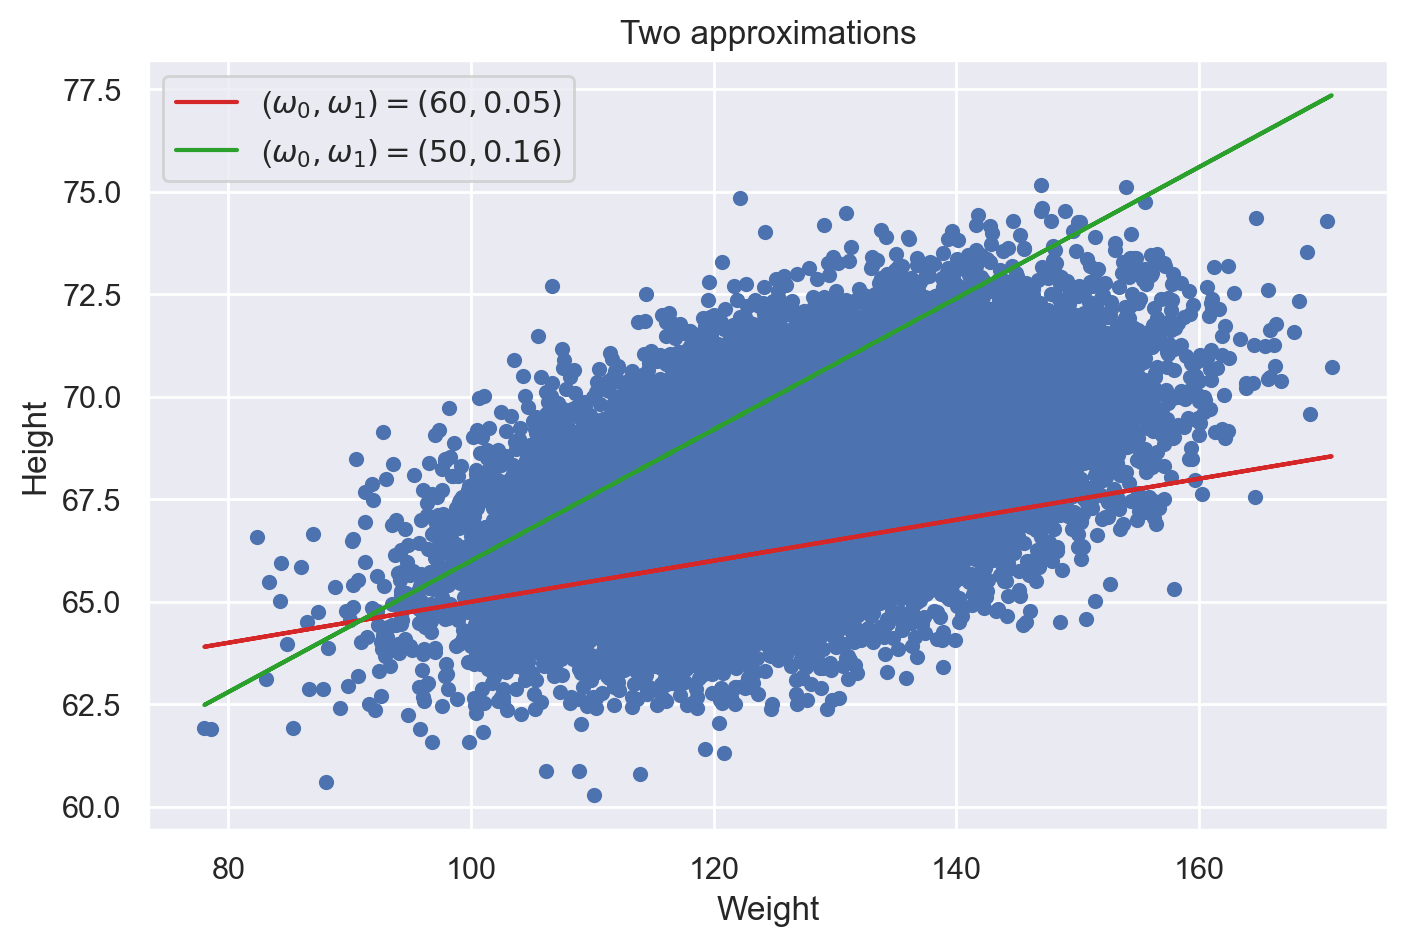

In [15]:
data.plot.scatter(x = "Weight", y = "Height", title ="Two approximations")
x = data["Weight"]
plt.plot(x, 60 + 0.05*x, label = "($\omega_0,\omega_1)=(60, 0.05)$", color = "tab:red")
plt.plot(x, 50 + 0.16*x, label = "($\omega_0,\omega_1)=(50, 0.16)$", color = "tab:green")
plt.legend()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

### 7. [1 балл] Постройте график зависимости функции ошибки, посчитанной в п. 5, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

Text(0, 0.5, 'error$(\\omega_1)$')

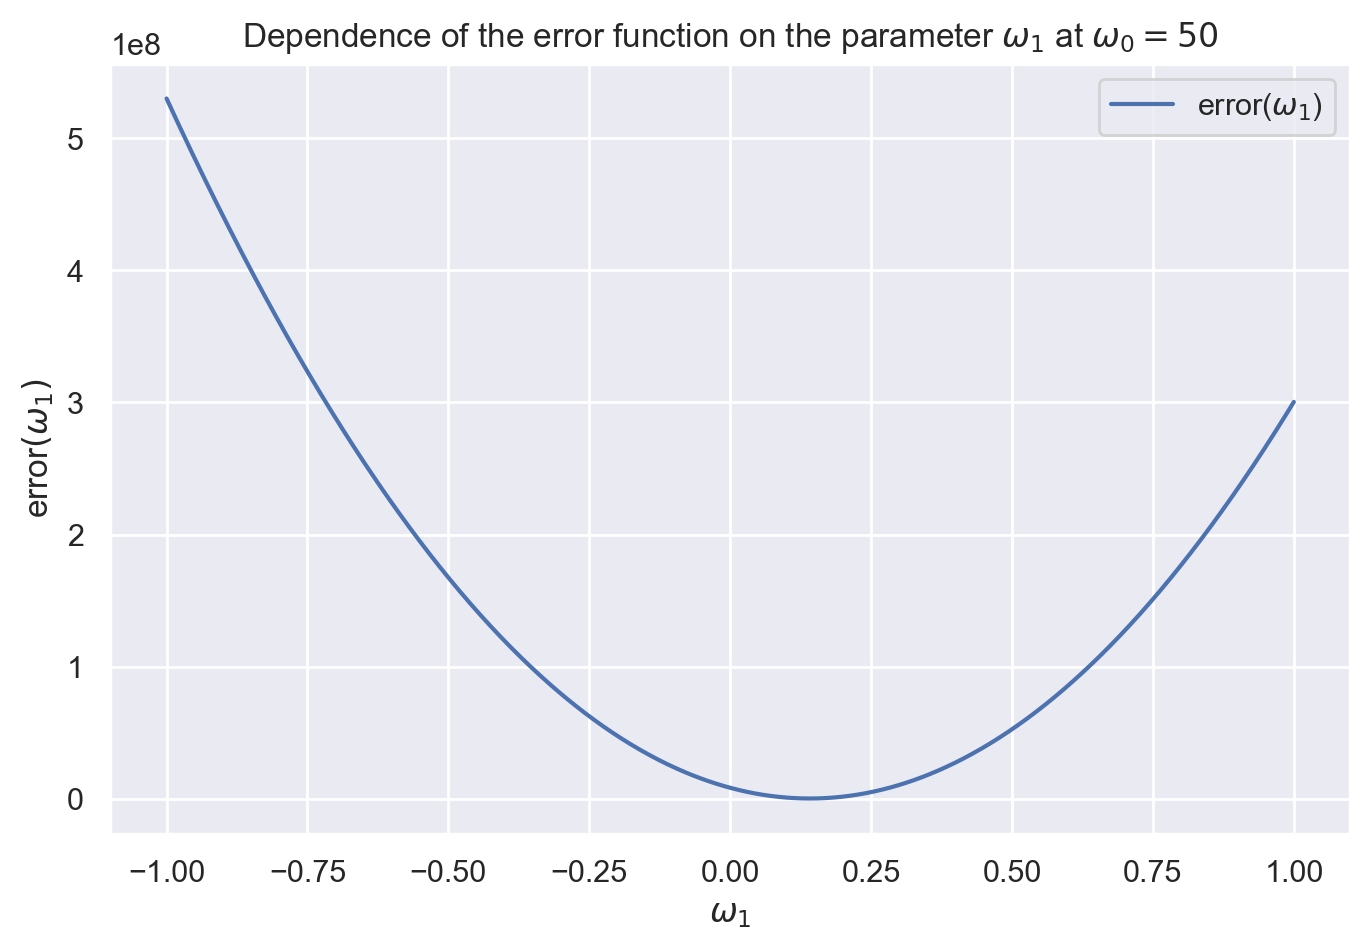

In [16]:
w1 = np.linspace(-1, 1, 1000)
plt.plot(w1, error(50, w1), label = "error($\omega_1$)")
plt.legend()
plt.title("Dependence of the error function on the parameter $\omega_1$ at $\omega_0 = 50$")
plt.xlabel("$\omega_1$")
plt.ylabel("error$(\omega_1)$")

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

Предлагаю воспользоваться методом minimize_scalar библиотеки scipy.
### 8. [2 балла]  Найдите минимум функции, определенной в п. 5, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 4 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное оптимальное значение параметра $w_1$. 

In [17]:
from scipy.optimize import minimize_scalar

In [18]:
def error_50(w1):
    return error(50, w1)

In [19]:
w1_opt = minimize_scalar(error_50, bounds=(-5, 5), method='bounded').x

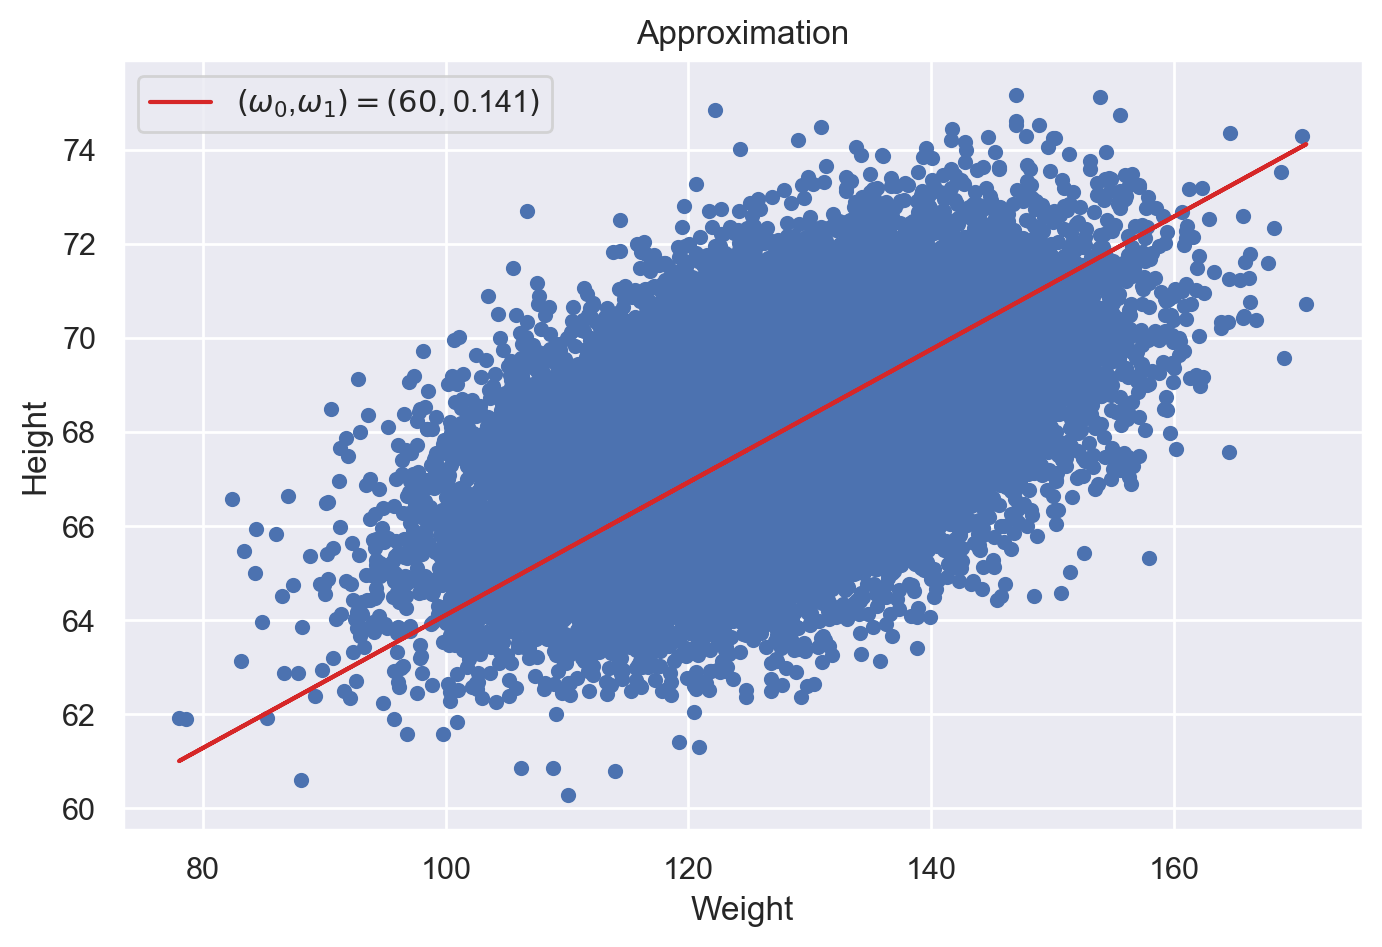

In [20]:
data.plot.scatter(x = "Weight", y = "Height", title = "Approximation")
plt.plot(x, 50 + w1_opt * x, color = "tab:red",  label = "$(\omega_0$,$\omega_1)=(60, $"+str(round(w1_opt, 3))+"$)$")
plt.legend()

### 9. [2 балла] Найдите минимум функции, определенной в п. 5, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Проведите на графике из п. 4 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.
Начальная точка – ($w_0$, $w_1$) = (0, 0). Предлагается использовать метод minimize из scypy.optimize, метод оптимизации L-BFGS-B.

In [21]:
from scipy.optimize import minimize

In [22]:
def error_arr(params):
    w0, w1 = params
    return error(w0, w1)

In [23]:
w0_op, w1_op = minimize(error_arr, [0, 0], method="L-BFGS-B", bounds = [(-100, 100),(-5, 5)]).x

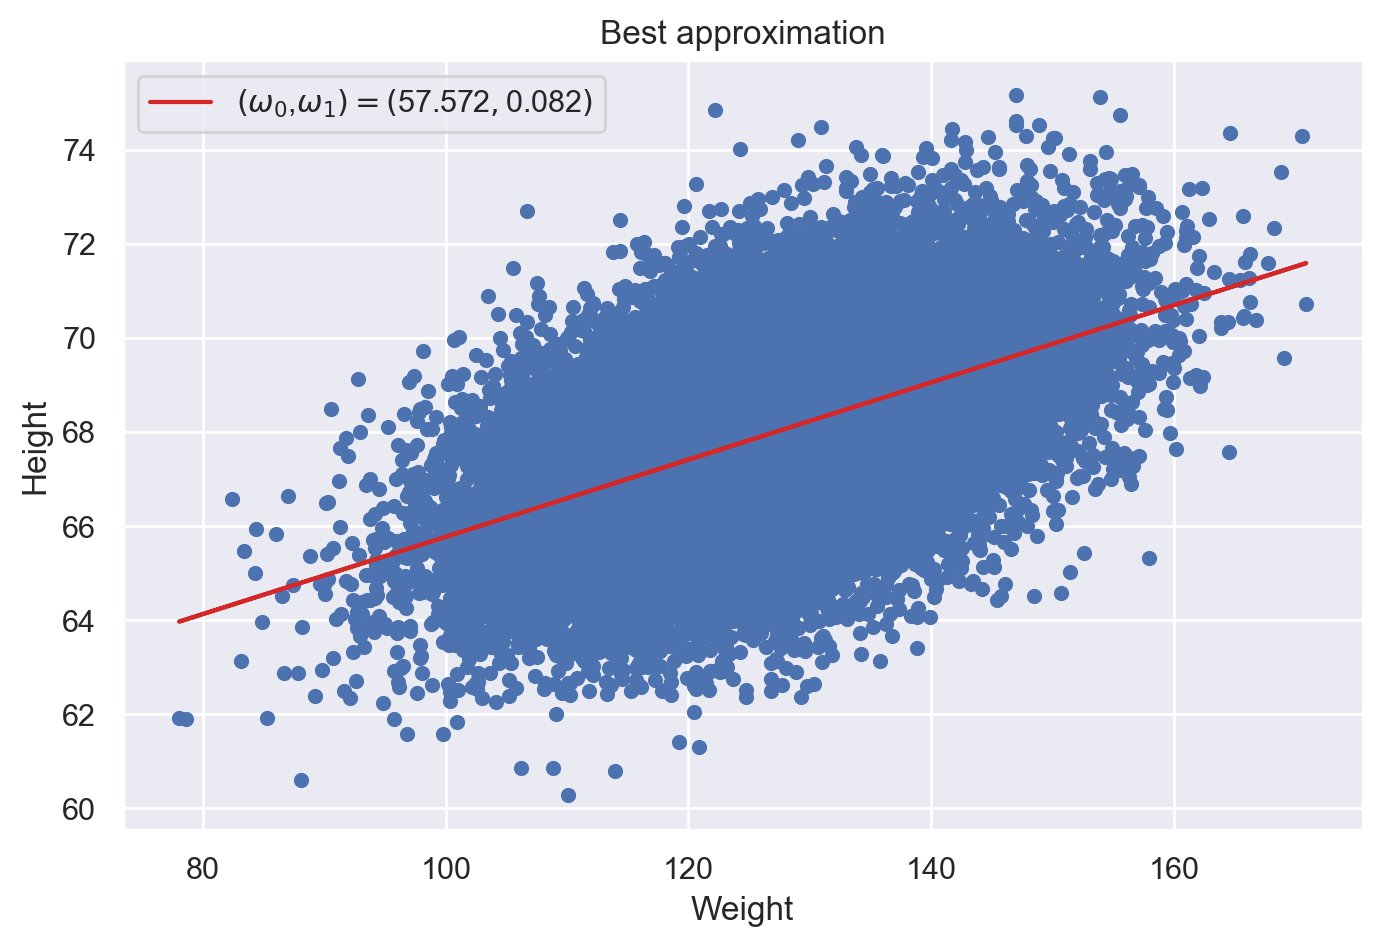

In [24]:
data.plot.scatter(x = "Weight", y = "Height", title = "Best approximation")
plt.plot(x, w0_op + w1_op * x, label = "$(\omega_0$,$\omega_1)=($"+ str(round(w0_op, 3)) + "$, $" + str(round(w1_op, 3))+"$)$", color = "tab:red" )
plt.legend()

## Дополнительные баллы:
### 10. [1 балл]: все графики выполнены аккуратно и подписаны
### 11. [0.5 балла]: прикрепите смешную картинку, описывающую ваши впечатления от выполнения ДЗ
*Итого*: максимум 10.5/10

In [25]:
%%HTML
<video width="960" height="540" controls>
  <source src="meme.mp4" type="video/mp4">
</video>

### Subtitles:
Chanel's voice-over: but i knew what i had to do\
Chanel: i have to kill myself